## Data Preprocessing

### Dataset import & visualization

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

alzheimers = pd.read_csv('/content/drive/MyDrive/CSE422 Project/alzheimers_disease_data.csv')
alzheimers.head(3)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid


In [ ]:
alzheimers.shape

(2149, 35)

### Null Value check

In [ ]:
alzheimers.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


No nulll values so no need for null drop or imputing.

### Dropping Redundant Features



PatientID, DoctorInCharge, EducationLevel, Ethnicity has no effect on the outcome.

In [ ]:
alzheimers = alzheimers.drop(['PatientID','DoctorInCharge','EducationLevel','Ethnicity'], axis = 1)
alzheimers.shape

(2149, 31)

In [ ]:
alzheimers.head(5)

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,...,6.045039,0,0,0.014691,0,0,1,1,0,0


### Feature Correlation

In [ ]:
alzheimers_corr = alzheimers.corr()
alzheimers_corr

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,0.028708,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,-0.018784,-0.015284,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,0.028708,1.000000,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,0.018421,0.034577,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
BMI,-0.015677,0.005928,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,0.006446,-0.005467,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.016650,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,-0.045811,0.027955,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,0.004330,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,-0.003707,-0.023632,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,-0.035795,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,-0.014106,0.003976,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.010942,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,-0.011261,-0.015220,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,0.007310,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,0.014801,0.002112,...,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548
FamilyHistoryAlzheimers,-0.018784,0.018421,0.006446,-0.045811,-0.003707,-0.014106,-0.011261,0.014801,1.000000,0.020783,...,-0.004650,-0.028348,-0.023558,0.014041,0.017976,0.035963,0.006839,0.008787,0.022339,-0.032900
CardiovascularDisease,-0.015284,0.034577,-0.005467,0.027955,-0.023632,0.003976,-0.015220,0.002112,0.020783,1.000000,...,-0.041270,0.031061,-0.016803,-0.012918,0.017658,0.025237,-0.032343,0.024684,0.010170,0.031490


<Axes: >

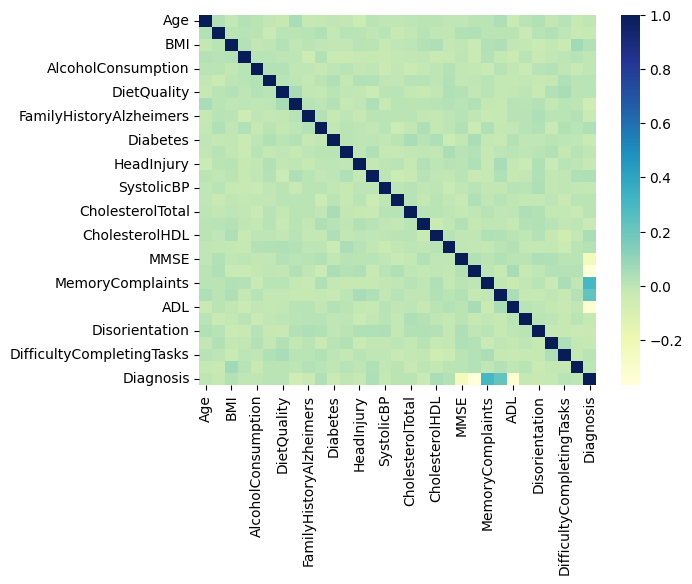

In [ ]:
import seaborn as sns

sns.heatmap(alzheimers_corr, cmap = 'YlGnBu')

No highly correlated features

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = alzheimers.drop('Diagnosis', axis=1)
y = alzheimers['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1504, 30)
X_test shape: (645, 30)


### Class Visualization

Diagnosis
0    1389
1     760
Name: count, dtype: int64


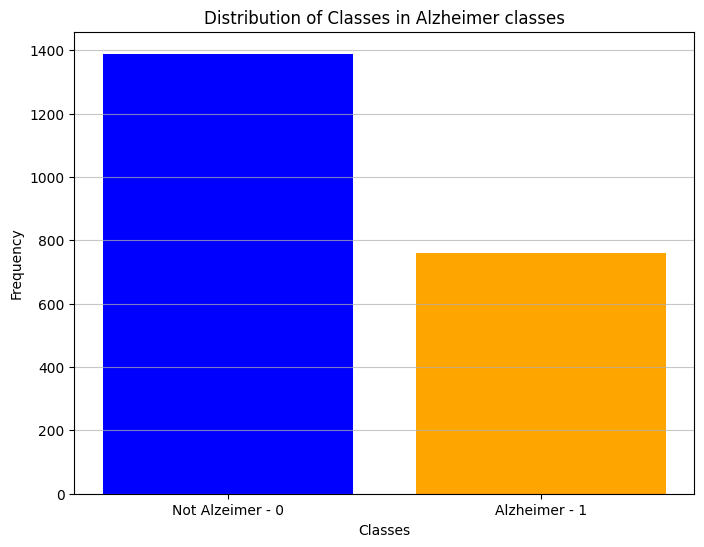

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


class_counts = y.value_counts()
print(class_counts)

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'], tick_label=['Not Alzeimer - 0', 'Alzheimer - 1'])


plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Distribution of Classes in Alzheimer classes")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)


plt.show()


### Data Scaling

Without Scaling accuracy

In [ ]:
print("per-feature minimum before scaling:\n {}".format(
    X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(
    X_train.max(axis=0)))

per-feature minimum before scaling:
 Age                           60.000000
Gender                         0.000000
BMI                           15.008851
Smoking                        0.000000
AlcoholConsumption             0.002003
PhysicalActivity               0.003616
DietQuality                    0.009385
SleepQuality                   4.002629
FamilyHistoryAlzheimers        0.000000
CardiovascularDisease          0.000000
Diabetes                       0.000000
Depression                     0.000000
HeadInjury                     0.000000
Hypertension                   0.000000
SystolicBP                    90.000000
DiastolicBP                   60.000000
CholesterolTotal             150.093316
CholesterolLDL                50.400003
CholesterolHDL                20.015125
CholesterolTriglycerides      50.407194
MMSE                           0.018022
FunctionalAssessment           0.000460
MemoryComplaints               0.000000
BehavioralProblems             0.000000
ADL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn.fit(X_train, y_train)
print("KNN test accuracy: {:.2f}".format(knn.score(X_test, y_test)))

KNN test accuracy: 0.58


MinMaxScaler Accuracy

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

knn.fit(X_train_scaled, y_train)
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy: 0.70


StandardScaler Accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn.fit(X_train_scaled, y_train)
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy: 0.75


In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [-1.63903567 -1.00533337 -1.76673493 -0.64100062 -1.77500412 -1.7253416
 -1.73226627 -1.71144762 -0.5804213  -0.39501116 -0.43249975 -0.5105755
 -0.31784413 -0.4117255  -1.68343857 -1.72428436 -1.78432624 -1.71958009
 -1.69231482 -1.7435449  -1.72778761 -1.76095553 -0.5105755  -0.4117255
 -1.68386644 -0.50643313 -0.42489264 -0.42052207 -0.42052207 -0.64926889]
per-feature maximum after scaling:
 [1.69625001 0.99469492 1.71326981 1.56006088 1.69122595 1.79887692
 1.69597366 1.6854419  1.72288645 2.53157402 2.31214004 1.95857419
 3.14619623 2.4288027  1.73777685 1.66590657 1.73765743 1.7601083
 1.7510463  1.66771265 1.77389961 1.6729197  1.95857419 2.4288027
 1.69003893 1.97459434 2.35353573 2.37799648 2.37799648 1.54019392]


As StandardScalar showed more accuracy we will use StandardScalar

# ML Models

### K-Nearest Neighbors

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", report_knn)

Accuracy: 0.7472868217054264
Confusion Matrix:
 [[369  48]
 [115 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       417
           1       0.70      0.50      0.58       228

    accuracy                           0.75       645
   macro avg       0.73      0.69      0.70       645
weighted avg       0.74      0.75      0.73       645



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", report_dt)

Accuracy: 0.8744186046511628
Confusion Matrix:
 [[367  50]
 [ 31 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       417
           1       0.80      0.86      0.83       228

    accuracy                           0.87       645
   macro avg       0.86      0.87      0.87       645
weighted avg       0.88      0.87      0.88       645



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", report_lr)

Accuracy: 0.8418604651162791
Confusion Matrix:
 [[369  48]
 [ 54 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       417
           1       0.78      0.76      0.77       228

    accuracy                           0.84       645
   macro avg       0.83      0.82      0.83       645
weighted avg       0.84      0.84      0.84       645



### Naive Bias

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", report_nb)

Accuracy: 0.7984496124031008
Confusion Matrix:
 [[350  67]
 [ 63 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       417
           1       0.71      0.72      0.72       228

    accuracy                           0.80       645
   macro avg       0.78      0.78      0.78       645
weighted avg       0.80      0.80      0.80       645



### Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt

# Create model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
nn_model.compile(optimizer=Adam(0.001),
                 loss=BinaryCrossentropy(),
                 metrics=['accuracy'])

In [ ]:
# Train model
history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=None, verbose=1)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6508 - loss: 0.6312
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8134 - loss: 0.4698
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.3749
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.3456
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8743 - loss: 0.3344
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8817 - loss: 0.3154
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8918 - loss: 0.2997
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.3007
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8989 - loss: 0.2825
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9116 - loss: 0.2581
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9050 - loss: 0.2581
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9301 - lo

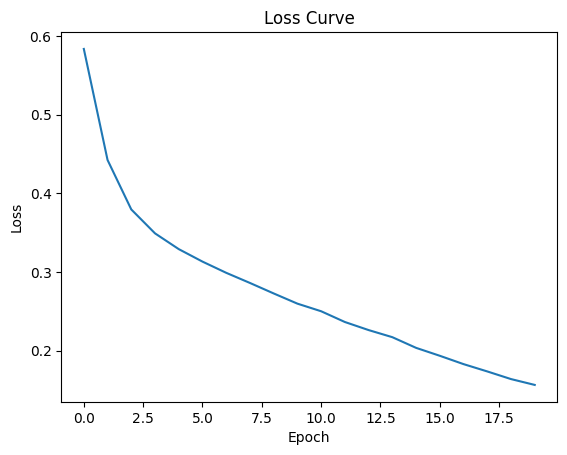

In [ ]:
# Plot loss curve
plt.plot(history.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Evaluate on test set
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print(f"Testing Accuracy: {round(accuracy_nn * 100, 2)}%")
print("Confusion Matrix:\n", conf_matrix_nn)
print("Classification Report:\n", report_nn)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testing Accuracy: 82.79%
Confusion Matrix:
 [[367  50]
 [ 61 167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       417
           1       0.77      0.73      0.75       228

    accuracy                           0.83       645
   macro avg       0.81      0.81      0.81       645
weighted avg       0.83      0.83      0.83       645



### Plot Accuracy

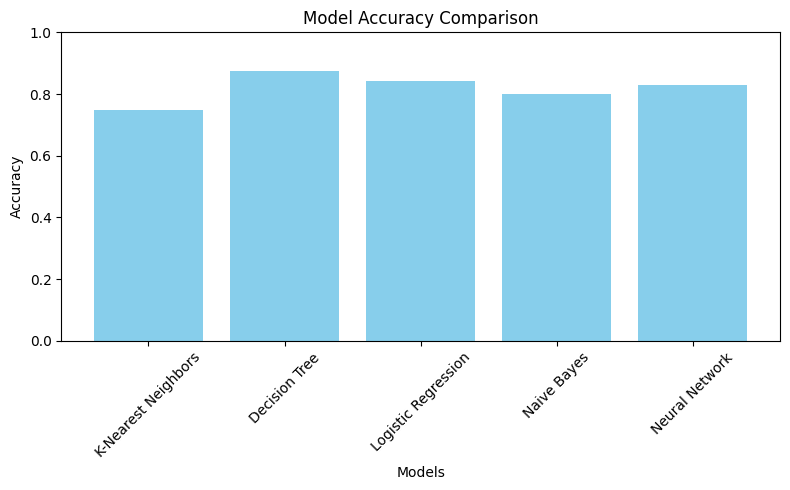

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


accuracies = {
    "K-Nearest Neighbors": accuracy_knn,
    "Decision Tree": accuracy_dt,
    "Logistic Regression": accuracy_lr,
    "Naive Bayes": accuracy_nb,
    "Neural Network": accuracy_nn
}


plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()